In [1]:
#Libraries

import pandas as pd
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: f'{x:.3f}')
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Support Function to inspect data
def inspect_data(df, col=None, n_rows=5):
    # data shape check
    print(f'data shape: {df.shape}')

    # column definition
    if col is None:
        col = df.columns

    # head data check, use display function to display dataframe
    display(df[col].head(n_rows))

# Support function to check missing value
def check_missing(df, cut_off=0, sort=True):
    freq=df.isnull().sum()
    percent=df.isnull().sum()/df.shape[0]*100
    types=df.dtypes
    unique = df.apply(pd.unique).to_frame(name='Unique Values')['Unique Values']
    df_miss=pd.DataFrame({'missing_percentage':percent, 'missing_frequency':freq, 'types':types, 'unique_values':unique})
    if sort: df_miss.sort_values(by='missing_frequency',ascending= False, inplace=True)
    return df_miss[df_miss['missing_percentage'] >= cut_off]

# Support function to fill the missing value
def fillna_by_metric(df, column_name, metric='mean', custom_value=None):
    # Takes metric values as per input
    if metric == 'mean':
        metric_value = df[column_name].mean()
    elif metric == 'median':
        metric_value = df[column_name].median()
    elif metric == 'mode':
        metric_value = df[column_name].mode().iloc[0]
    elif metric == 'zero':
        metric_value = 0
    elif metric == 'custom':
        metric_value = custom_value
    else:
        raise ValueError("Invalid metric type")

    # Fill in the missing values in the column with the metric values that have been taken
    df[column_name].fillna(value=metric_value, inplace=True)

    return df

In [6]:
# Load Data and inspect the data shape
df = pd.read_csv("/content/Walmart.csv")
inspect_data(df)

data shape: (6435, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.900,0,42.310,2.572,211.096,8.106
1,1,12-02-2010,1641957.440,1,38.510,2.548,211.242,8.106
2,1,19-02-2010,1611968.170,0,39.930,2.514,211.289,8.106
3,1,26-02-2010,1409727.590,0,46.630,2.561,211.320,8.106
4,1,05-03-2010,1554806.680,0,46.500,2.625,211.350,8.106


In [7]:
# Check misisng
check_missing(df)

,missing_percentage,missing_frequency,types,unique_values
Store,0.000,0,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Date,0.000,0,object,"[05-02-2010, 12-02-2010, 19-02-2010, 26-02-201..."
Weekly_Sales,0.000,0,float64,"[1643690.9, 1641957.44, 1611968.17, 1409727.59..."
Holiday_Flag,0.000,0,int64,"[0, 1]"
Temperature,0.000,0,float64,"[42.31, 38.51, 39.93, 46.63, 46.5, 57.79, 54.5..."
Fuel_Price,0.000,0,float64,"[2.572, 2.548, 2.514, 2.561, 2.625, 2.667, 2.7..."
CPI,0.000,0,float64,"[211.0963582, 211.2421698, 211.2891429, 211.31..."
Unemployment,0.000,0,float64,"[8.106, 7.808, 7.787, 7.838, 7.742, 7.682, 7.9..."


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [9]:
#Analyzing Data

descriptive = df['Weekly_Sales'].describe().reset_index()
descriptive

,index,Weekly_Sales
0,count,6435.000
1,mean,1046964.878
2,std,564366.622
3,min,209986.250
4,25%,553350.105
5,50%,960746.040
6,75%,1420158.660
7,max,3818686.450


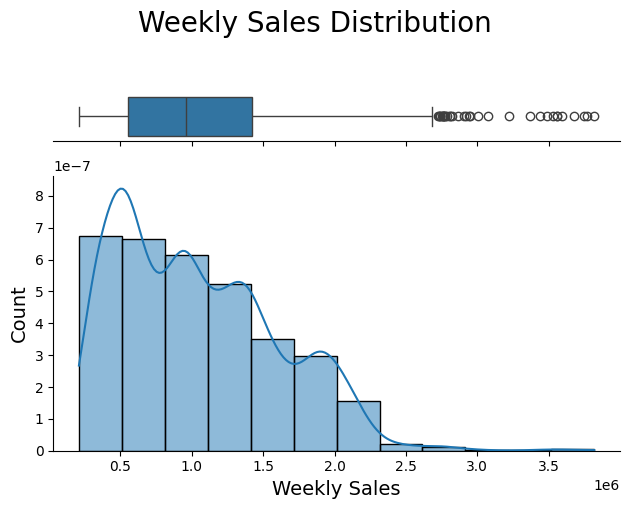

In [10]:
1.#Boxplot Histogram

# Create subplots
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Create boxplot
sns.boxplot(x=df['Weekly_Sales'], ax=ax_box)
ax_box.set(xlabel='')  # Remove x-label from the box plot

# Create histogram
sns.histplot(x=df['Weekly_Sales'], bins=12, kde=True, stat='density', ax=ax_hist)

# Remove y-ticks from the box plot
ax_box.set(yticks=[])

# Despine the plots
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

# Add title above the box plot
plt.suptitle('Weekly Sales Distribution', fontsize=20, y=1.05)  # Adjust the 'y' value to position the title

# Add label for X and Y to the histogram
ax_hist.set_xlabel('Weekly Sales', fontsize=14)
ax_hist.set_ylabel('Count', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
#Create total sales overtime weekely and monthly datasets

# Create week_year and month_year column
df['month_year'] = df['Date'].dt.strftime('%m-%Y')
# Change month_year datatype from object to datetime
df['month_year'] = pd.to_datetime(df['month_year'], format='%m-%Y')

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month_year
0,1,2010-02-05,1643690.900,0,42.310,2.572,211.096,8.106,2010-02-01
1,1,2010-02-12,1641957.440,1,38.510,2.548,211.242,8.106,2010-02-01
2,1,2010-02-19,1611968.170,0,39.930,2.514,211.289,8.106,2010-02-01
3,1,2010-02-26,1409727.590,0,46.630,2.561,211.320,8.106,2010-02-01
4,1,2010-03-05,1554806.680,0,46.500,2.625,211.350,8.106,2010-03-01


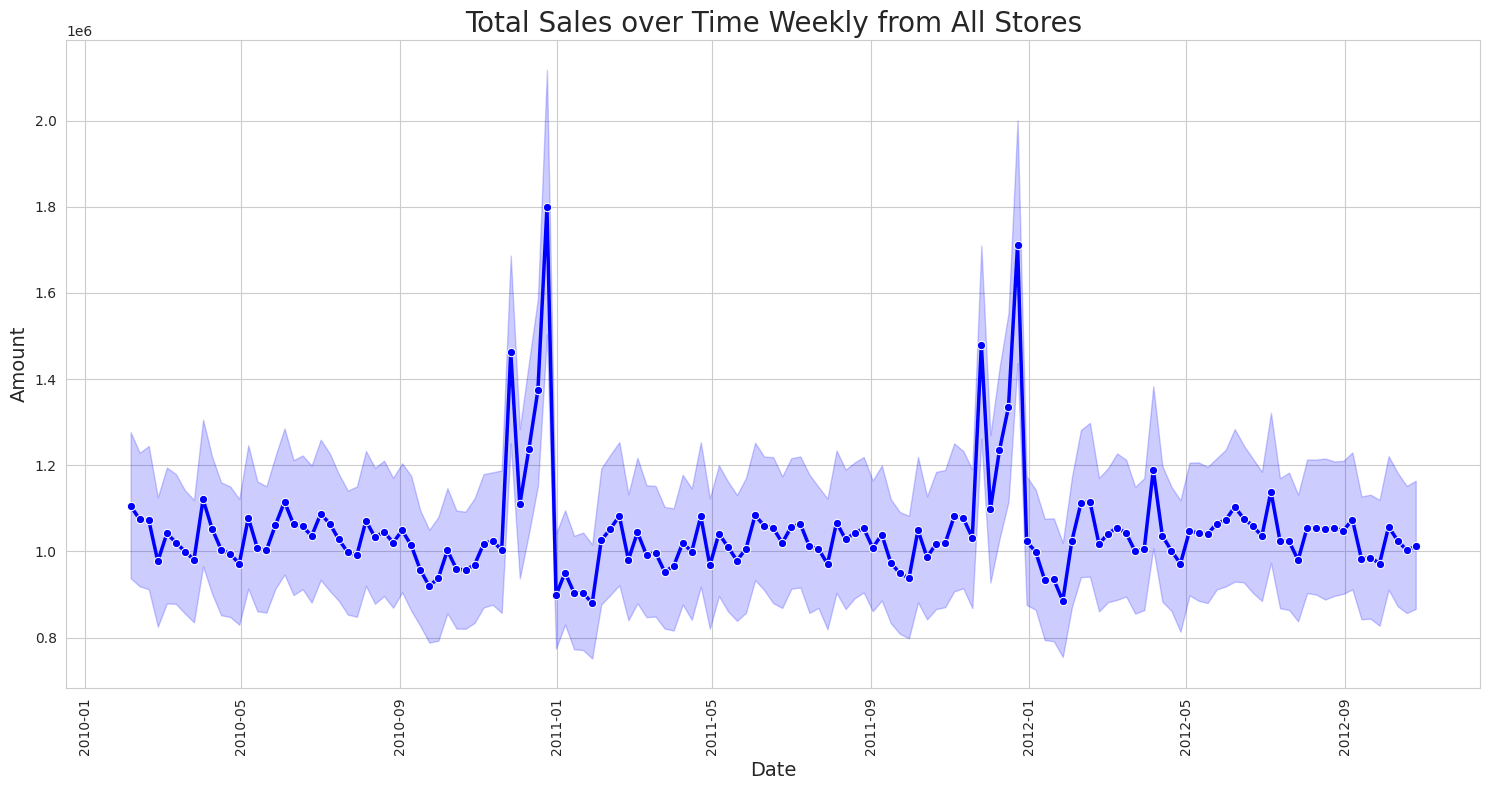

In [12]:
2.#Create sales overtime weekly line chart by using seaborn

sns.set_style('whitegrid')

# create plot
plt.figure(figsize=(15, 8))

# Plot lineplot
sns.lineplot(data=df, x='Date', y='Weekly_Sales', marker='o', color='b', linewidth=2.5)

# Add tittle
plt.title('Total Sales over Time Weekly from All Stores', fontsize=20)

# Add label for X and Y
plt.xlabel('Date', fontsize=14)
plt.ylabel('Amount', fontsize=14)

# Rotated the x label for 90 degree
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

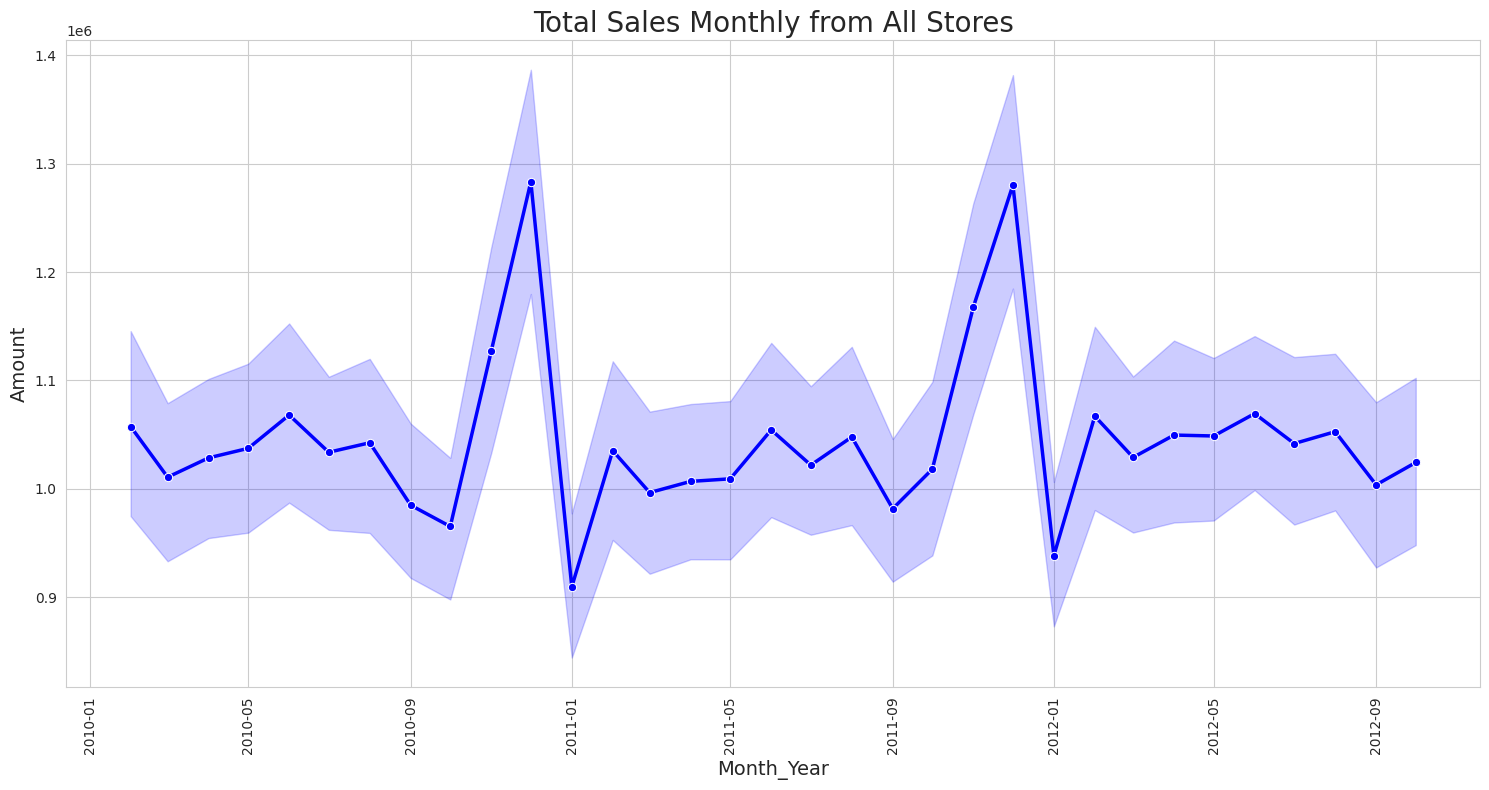

In [13]:
3.#To create sales overtime monthly by seaborn plot

sns.set_style('whitegrid')

# create plot
plt.figure(figsize=(15, 8))

# Plot lineplot
sns.lineplot(data=df, x='month_year', y='Weekly_Sales', marker='o', color='b', linewidth=2.5)

# Add tittle
plt.title('Total Sales Monthly from All Stores', fontsize=20)

# Add label for X and Y
plt.xlabel('Month_Year', fontsize=14)
plt.ylabel('Amount', fontsize=14)

# Rotated the x label for 90 degree
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
4.#Check Total Sales for Each Stores!

#Start with aggregate ‘Weekly_Sales’ column and group it by ‘Store’.

store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index().sort_values(by='Weekly_Sales', ascending=False)
store_sales.rename(columns={'Weekly_Sales': 'Sales'}, inplace=True)
store_sales

,Store,Sales
19,20,301397792.460
3,4,299543953.380
13,14,288999911.340
12,13,286517703.800
1,2,275382440.980
9,10,271617713.890
26,27,253855916.880
5,6,223756130.640
0,1,222402808.850
38,39,207445542.470


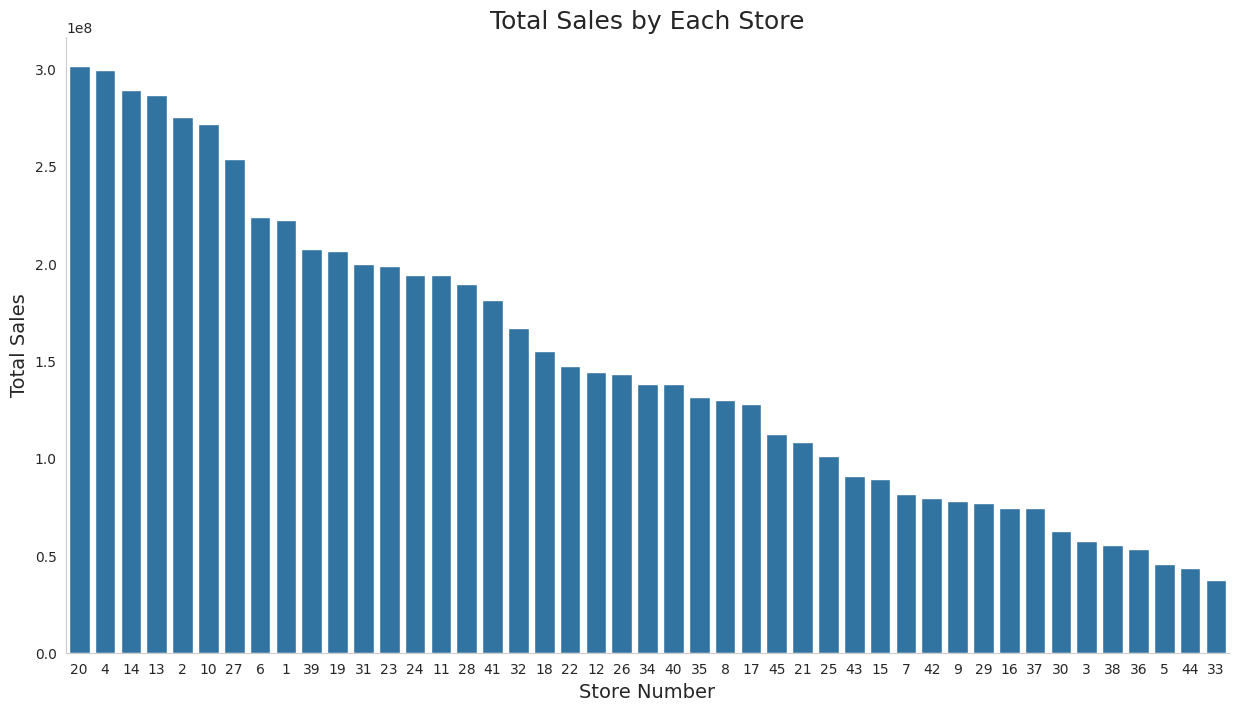

In [15]:
#Plot using bar char

# create plot
plt.figure(figsize=(15, 8))

# Create bar plot
ax = sns.barplot(data=store_sales, x='Store', y='Sales', order=store_sales['Store'])
ax.set_xticklabels(ax.get_xticklabels())
ax.grid(False) # remove x grid

# Set axis labels and titles
ax.set_xlabel('Store Number', fontsize=14)
ax.set_ylabel('Total Sales', fontsize=14)
ax.set_title('Total Sales by Each Store', fontsize=18)

# Remove spines
sns.despine()

In [16]:
5.# Compare Average Sales between Holiday Week and Normal Week.

avg_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
avg_sales.rename(columns={'Weekly_Sales': 'Average_Sales'}, inplace=True)

# Replace values in the Holiday_Flag column
avg_sales['Holiday_Flag'] = avg_sales['Holiday_Flag'].replace({0: 'Non-Holiday Week', 1: 'Special Holiday Week'})

avg_sales




,Holiday_Flag,Average_Sales
0,Non-Holiday Week,1041256.380
1,Special Holiday Week,1122887.892


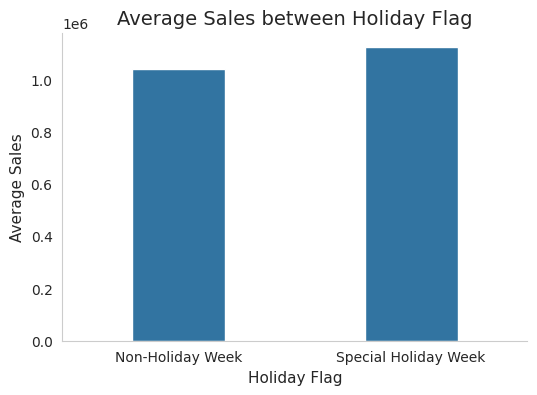

In [17]:
# create plot
plt.figure(figsize=(6, 4))

# Create bar plot
ax = sns.barplot(data=avg_sales, x='Holiday_Flag', y='Average_Sales', width=0.4)
ax.set_xticklabels(ax.get_xticklabels())
ax.grid(False) # remove x grid

# Set axis labels and titles
ax.set_xlabel('Holiday Flag', fontsize=11)
ax.set_ylabel('Average Sales', fontsize=11)
ax.set_title('Average Sales between Holiday Flag', fontsize=14)

# Remove spines
sns.despine()

In [18]:
6.#Compare Total Sales during Special Holiday Week.

# Filter the dataframe only with Holiday_Flag > 0
condition = df['Holiday_Flag'] > 0
filtered_df = df[condition]

filtered_df = filtered_df.reset_index(drop=True)

print(filtered_df)

     Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0        1 2010-02-12   1641957.440             1       38.510       2.548   
1        1 2010-09-10   1507460.690             1       78.690       2.565   
2        1 2010-11-26   1955624.110             1       64.520       2.735   
3        1 2010-12-31   1367320.010             1       48.430       2.943   
4        1 2011-02-11   1649614.930             1       36.390       3.022   
5        1 2011-09-09   1540471.240             1       76.000       3.546   
6        1 2011-11-25   2033320.660             1       60.140       3.236   
7        1 2011-12-30   1497462.720             1       44.550       3.129   
8        1 2012-02-10   1802477.430             1       48.020       3.409   
9        1 2012-09-07   1661767.330             1       83.960       3.730   
10       2 2010-02-12   2137809.500             1       38.490       2.548   
11       2 2010-09-10   1839128.830             1       79.090  

In [19]:
# List of the holiday_event
holiday_events = {
    'Super Bowl': ['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08'],
    'Labour Day': ['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06'],
    'Thanksgiving': ['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29'],
    'Christmas': ['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27']
}

# Convert the data type from string to date time
for event, dates in holiday_events.items():
    holiday_events[event] = pd.to_datetime(dates, format='%Y-%m-%d')

# Add a new column 'Holiday_Event' and initialize with 'None'
filtered_df['Holiday_Event'] = 'None'

# Update the 'Holiday_Event' column based on the date
for event, dates in holiday_events.items():
    filtered_df.loc[filtered_df['Date'].isin(dates), 'Holiday_Event'] = event

display(filtered_df)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month_year,Holiday_Event
0,1,2010-02-12,1641957.440,1,38.510,2.548,211.242,8.106,2010-02-01,Super Bowl
1,1,2010-09-10,1507460.690,1,78.690,2.565,211.495,7.787,2010-09-01,Labour Day
2,1,2010-11-26,1955624.110,1,64.520,2.735,211.748,7.838,2010-11-01,Thanksgiving
3,1,2010-12-31,1367320.010,1,48.430,2.943,211.405,7.838,2010-12-01,Christmas
4,1,2011-02-11,1649614.930,1,36.390,3.022,212.937,7.742,2011-02-01,Super Bowl
5,1,2011-09-09,1540471.240,1,76.000,3.546,215.861,7.962,2011-09-01,Labour Day
6,1,2011-11-25,2033320.660,1,60.140,3.236,218.468,7.866,2011-11-01,Thanksgiving
7,1,2011-12-30,1497462.720,1,44.550,3.129,219.536,7.866,2011-12-01,Christmas
8,1,2012-02-10,1802477.430,1,48.020,3.409,220.265,7.348,2012-02-01,Super Bowl
9,1,2012-09-07,1661767.330,1,83.960,3.730,222.439,6.908,2012-09-01,Labour Day


In [20]:
# Aggregate the sum of sales by Holiday Event
holiday_sales = filtered_df.groupby('Holiday_Event')['Weekly_Sales'].sum().reset_index().sort_values(by='Weekly_Sales', ascending=False)
holiday_sales.rename(columns={'Weekly_Sales': 'Sales'}, inplace=True)
holiday_sales

,Holiday_Event,Sales
2,Super Bowl,145682278.340
1,Labour Day,140727684.680
3,Thanksgiving,132414608.500
0,Christmas,86474980.040


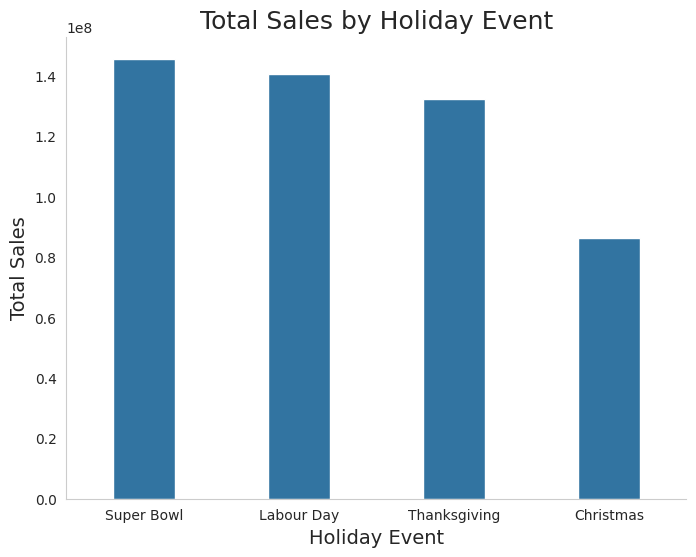

In [21]:
# create plot
plt.figure(figsize=(8, 6))

# Create bar plot
ax = sns.barplot(data=holiday_sales, x='Holiday_Event', y='Sales', order=holiday_sales['Holiday_Event'], width=0.4)
ax.set_xticklabels(ax.get_xticklabels())
ax.grid(False) # remove x grid

# Set axis labels and titles
ax.set_xlabel('Holiday Event', fontsize=14)
ax.set_ylabel('Total Sales', fontsize=14)
ax.set_title('Total Sales by Holiday Event', fontsize=18)

# Remove spines
sns.despine()

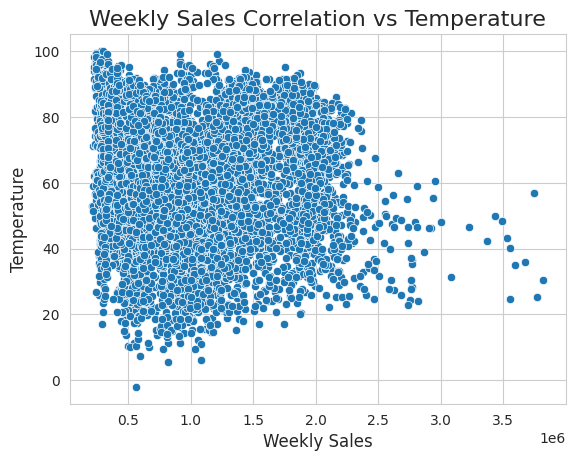

In [22]:
7.#Find Correlation between Weekly_Sales vs Temperature, Unemployment, CPI and Fuel Price!

# Create Scatterplot
sns.scatterplot(df, x="Weekly_Sales", y="Temperature")

# Extra Parameter
plt.title('Weekly Sales Correlation vs Temperature', fontsize=16)
plt.xlabel('Weekly Sales', fontsize=12)
plt.ylabel('Temperature', fontsize=12)

plt.show()


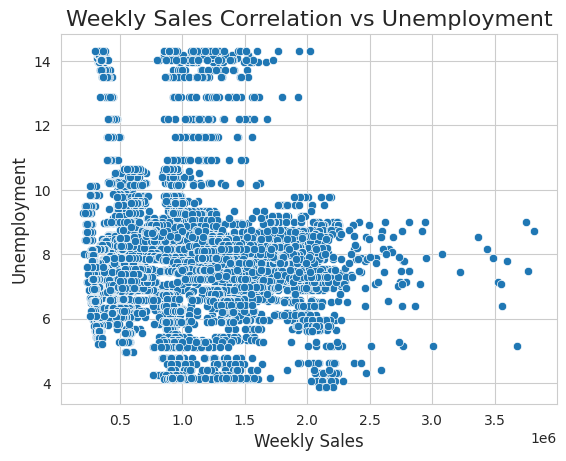

In [23]:
# Create Scatterplot
sns.scatterplot(df, x="Weekly_Sales", y="Unemployment")

# Extra Parameter
plt.title('Weekly Sales Correlation vs Unemployment', fontsize=16)
plt.xlabel('Weekly Sales', fontsize=12)
plt.ylabel('Unemployment', fontsize=12)

plt.show()

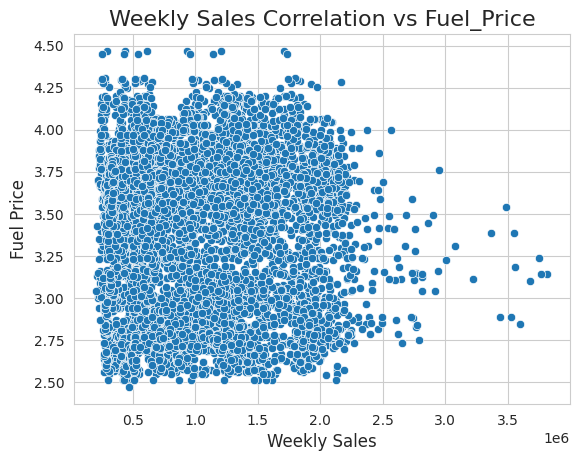

In [24]:
# Create Scatterplot
sns.scatterplot(df, x="Weekly_Sales", y="Fuel_Price")

# Extra Parameter
plt.title('Weekly Sales Correlation vs Fuel_Price', fontsize=16)
plt.xlabel('Weekly Sales', fontsize=12)
plt.ylabel('Fuel Price', fontsize=12)

plt.show()
